In [1]:
import sys
sys.path.insert(0, '../')
from lib import *

from scipy.stats import norm
from scipy.optimize import curve_fit

%matplotlib inline

DEBUG = False;

# Define Gaussian function
def gaussian(x, mu, sigma,A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

## Ratios

In [ ]:
# WEEK="APSAIA_VUV_2";
# WEEK="DAPHNE_VUV";OV=12


plt.figure(dpi=200)



for WEEK,counter in zip(["APSAIA_VUV","APSAIA_VUV_2","DAPHNE_VUV"],[1,2,3]):
    z=0;
# for WEEK in ["DAPHNE_VUV"]:
# for WEEK in ["APSAIA_VUV_2"]:
# for WEEK in ["APSAIA_VUV"]:

    compress=False

    path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
    Runs=open_runs_table("../macros/"+WEEK+".xlsx")

    ovs=[2 , 2.5, 3]
    if WEEK=="DAPHNE_VUV":ovs=[7,9,12]
    
    for OV in ovs:
        
        for run in Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]["Run"]:
        # run=Runs.iloc[5]["Run"]

            print(run)
        # def charge_ratio(charge):
        #     SiPMs_12=(charge[0]+charge[1])
        #     SiPMs_34=(charge[2]+charge[3])
        #     return SiPMs_12/SiPMs_34

            # for chargemode in ["ChargeRange"]:
            for chargemode in ["PeakFinderInRange"]:
                charge =[]
                charge2=[]compress=False

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")

ovs=[2 , 2.5, 3]
if WEEK=="DAPHNE_VUV":ovs=[7,9,12]

for OV in ovs:
    
    for run in Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]["Run"]:

                q_cut=Charge_vars[chargemode]*ADCsxticks2PE>2
                
                CUT=ped_cut*amp_cut
                hist, bins = np.histogram(Charge_vars[chargemode]*ADCsxticks2PE,100,[0,40])

                # popt, _ = curve_fit(gaussian, bins[:-1], hist,[16,5,852])
                
                # plt.hist(Charge_vars[chargemode][CUT],100,[0,.4e5],alpha=.5,histtype="step",linewidth=2)

                charge.append(np.mean(Charge_vars[chargemode][CUT]*ADCsxticks2PE))
                charge2.append(popt[0])

                # plt.legend()
                # print(chargemode)
                # print(charge_ratio(charge ))
                # print(charge_ratio(charge2))    
                
                # plt.legend(["0","1","2","3"])
                
                if (counter==1):
                    if  z==0:plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),".",color="tab:green" ,label=WEEK)
                    else    :plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),".",color="tab:green")
                if (counter==2):
                    if  z==0:plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"s",color="tab:orange" ,label=WEEK)
                    else    :plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"s",color="tab:orange")
                if (counter==3):
                    if  z==0:plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"x",color="tab:blue" ,label=WEEK)
                    else    :plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"x",color="tab:blue")
                z=1
                # plt.plot(run,(charge[1])/(charge[3]),"x")
                # plt.plot(run,(charge[1])/(charge[2]),"s")
        
        
plt.legend()
# plt.xlim([0,1])
plt.ylim([.8,1.2])
plt.grid()
plt.xlabel("run")

## Ch0

1
19.929160997933874
184.7768777687777
18.454922870386653


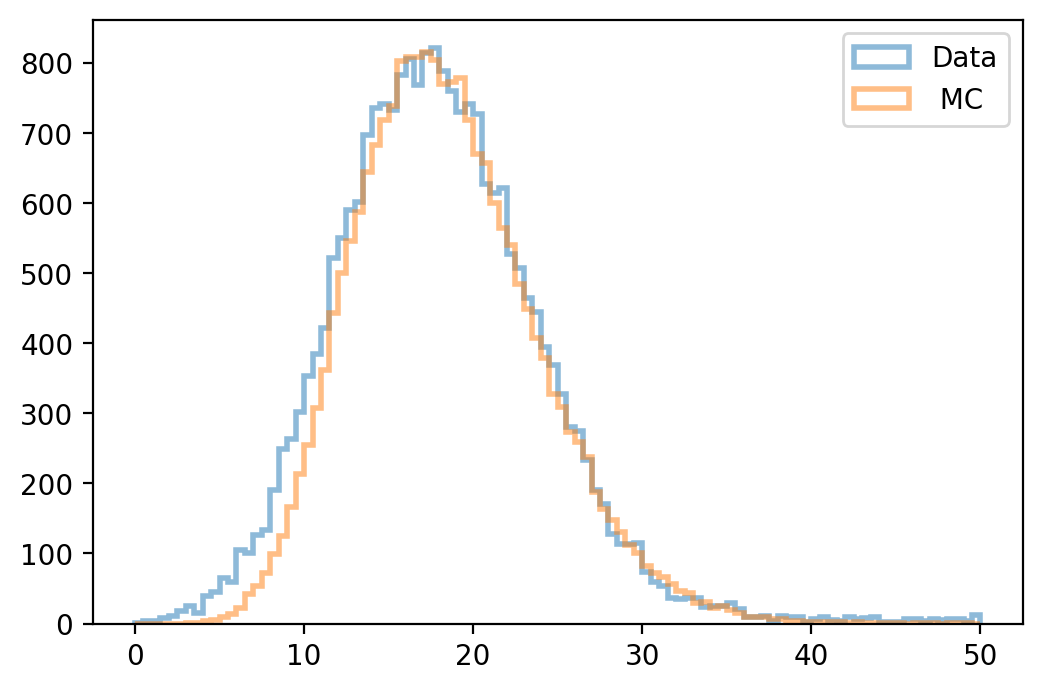

In [86]:
import uproot


file=uproot.open("npy_filess/192k_ev_100k_evs.root")

sensor=file["Hits"]["fsensor"] .array()
nhits =file["Hits"]["acumHits"].array() 


WEEK="APSAIA_VUV_2";OV=4
WEEK="DAPHNE_VUV"  ;OV=4

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
compress=False

for run in [Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageSiPMs"]==OV)]["Run"][1]]:
    print(run)
    #  Data

    # for chargemode in ["ChargePeakRange","ChargeRangeAverageWvf","ChargeRange","ChargeRangeRelativeAmp"]:
    for chargemode in ["ChargeRange"]:
        
        plt.figure(dpi=200)
        for ch in [0]:
            
            if ch<3:ADCsxticks2PE=GetGains(WEEK,ch,OV)
            else   :ADCsxticks2PE=GetGains(WEEK,ch,OV)

            run_path=path+"run"+str(run).zfill(2)+"/";
            Charge_vars     =open_ch_var(run_path ,"Charge_vars" ,ch,compressed=compress)
            Peak_vars       =open_ch_var(run_path ,"Peak_vars"   ,ch,compressed=compress)
            Pedestal_vars   =open_ch_var(run_path ,"Pedestal_vars"   ,ch,compressed=compress)
            
            ped_cut=Pedestal_vars["STD"]<(np.mean(Pedestal_vars["STD"])+2*np.std(Pedestal_vars["STD"]))
            amp_cut=Peak_vars["Peak"]>70
            CUT=ped_cut*amp_cut
            
            hist_DATA=plt.hist(Charge_vars[chargemode][CUT]*ADCsxticks2PE,100,[0,50],alpha=.5,histtype="step",linewidth=2)
            
    print(np.mean(Charge_vars[chargemode][CUT]*ADCsxticks2PE) )
    plt.semilogy()
    
    
    

#  MC
aux_binom=np.zeros(nhits[sensor==1].shape[0])

MC=nhits[sensor==1]
weights=len(Charge_vars[chargemode][CUT])/len(MC)*np.ones(len(MC))

print(np.mean(MC))
efficiency=0.1
aux_poiss=np.zeros(MC.shape[0])
z=0
for nphot in MC:
    
    # ## binomial distribution for each photon. 1=detected, 0=not detected
    # dice=np.random.uniform(0,1,int(nphot)) 
    # aux_poiss[z]=np.sum(dice<efficiency)

    ## poisson distribution, faster but less accurate for low number of photons (the tails are not well reproduced)
    lambda_ = efficiency * nphot
    aux_poiss[z]   =np.random.poisson(lambda_)
    z+=1;

MC=aux_poiss

elec_smear=0.15
MC*=np.random.normal(1, elec_smear, int(MC.shape[0]))

plt.hist(aux_poiss,100,[0,50],alpha=.5,histtype="step",linewidth=2,weights=weights/1.1);


print(np.mean(aux_poiss))

plt.yscale("log")
plt.yscale("linear")
plt.legend(["Data"," MC"])

In [92]:


sen=1
def chisq_scan(npixels=100):
    
    def chisq(a,b,dof=1):
        return np.sum((a-b)**2/b)/dof
    
    aux_chisq=[]
    aux_eff=[]

    RANGE=100
    elec_res=0.15
    effi_range=np.linspace(0.95,0.15 ,npixels)

    for efficiency in effi_range:

        aux_poiss=np.zeros(nhits[sensor==sen].shape[0])

        z=0
        for nphot in nhits[sensor==sen]:
            ## poisson distribution, faster but less accurate for low number of photons (the tails are not well reproduced)
            lambda_ = efficiency * nphot
            aux_poiss[z]   =np.random.poisson(lambda_)
            z+=1;


        aux_MC=np.zeros((RANGE,hist_DATA[0].shape[0]))
        
        for i in range(RANGE):
            a=np.histogram(aux_poiss*np.random.normal(1, elec_smear, int(MC.shape[0])),100,[0,50],weights=weights/1.1);
            aux_MC[i,:]=a[0]
            
        x=np.mean(aux_MC,axis=0) [35:80]
        y=hist_DATA[0]           [35:80]
        aux_chisq.append(chisq(y,x,dof=len(x)-1))
        aux_eff.append(efficiency)
    return np.array(aux_chisq),np.array(aux_eff)



In [93]:
aux_chisq,aux_eff=chisq_scan()

/afs/ciemat.es/user/r/rodrigoa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in true_divide

